In [1]:
# Liu, Sen, et al. "Automated phase segmentation and quantification of high-resolution TEM image for alloy design."
# Materials Characterization 199 (2023): 112779.
# Jupyter code for above paper, by first author Dr. Sen Liu
# Cite this paper if you leverage the AI techniques we showed. Contact: sen.liu@louisiana.edu; senliu@slac.stanford.edu

# 2D image data analysis

In [24]:
import numpy as np
import matplotlib
import pandas as pd
import sklearn as sk
from sklearn.decomposition import PCA, KernelPCA

In [4]:
import scipy.io as sio
import numpy.matlib as nm
import matplotlib.pyplot as plt

t = sio.loadmat('980-0.25-720-24_28-240803.mat')
Xt = t['X'] # Composition of samples

In [5]:
Xt.shape

(2500, 57600)

## PCA analysis for phase visualization analysis

In [6]:
pca = PCA(n_components=10)
pca.fit(Xt)

print(pca.singular_values_.shape) 
print(pca.explained_variance_ratio_.shape)  


(10,)
(10,)


In [7]:
print(pca.components_.shape)

(10, 57600)


In [8]:
X_pca=pca.fit_transform(Xt)

In [9]:
print(X_pca.shape)

(2500, 10)


(2500,)


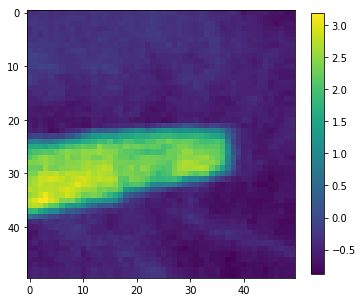

In [13]:
plt.figure(2, figsize=(6,6))

a1=X_pca[:,0]
print(a1.shape)
eigenfaces1 = np.reshape(a1, (50, 50))
im = plt.imshow(eigenfaces1.T)
plt.colorbar(im, shrink=0.8)

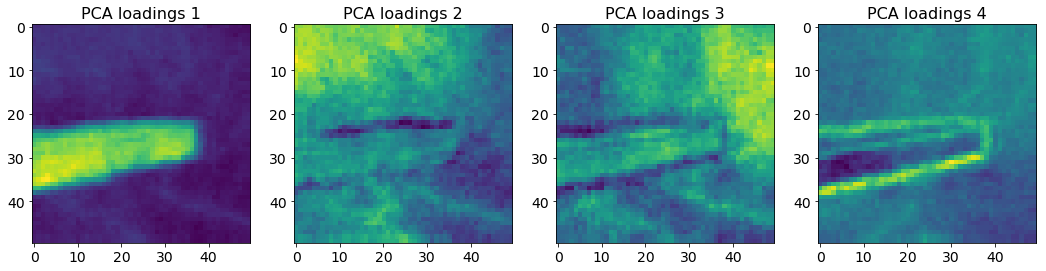

In [16]:
# plot the results
plt.figure(1, figsize=(18,12))
ax = plt.gca()
indx=[1,2,3,4]

for i in indx:
    plt.subplot(1,4,i)
    a1=X_pca[:,i-1]
    loadings = np.reshape(a1, (50, 50))
    plt.imshow(loadings.T)
    plt.title("PCA loadings " + "{}".format(i), fontsize=16)
    plt.xlabel("",fontsize=16)
    plt.ylabel("", fontsize=16)
    plt.tick_params(labelsize=14)

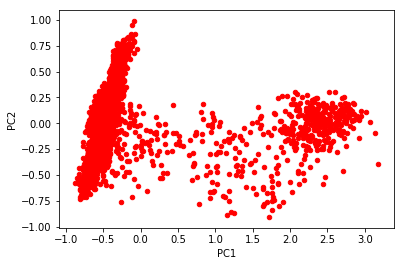

In [17]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c="r", s=20)

plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.show()

plt.savefig('PC1-PC2.png',bbox_inches='tight',dpi=300)
#plt.show()

[]

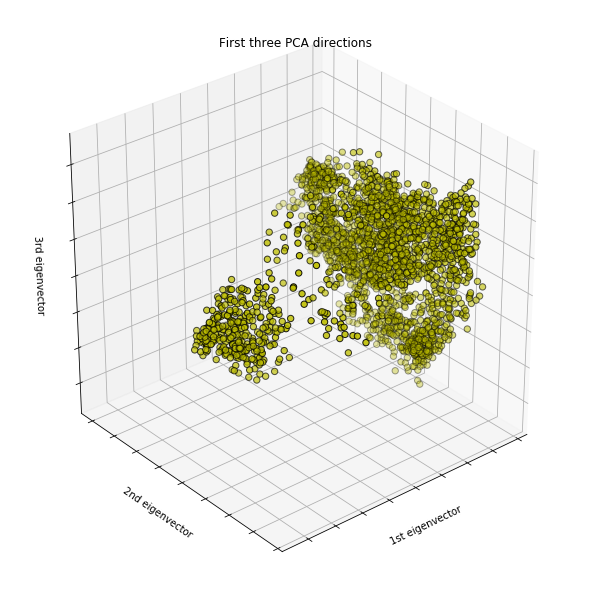

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, elev=-150, azim=130)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c="y", cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])



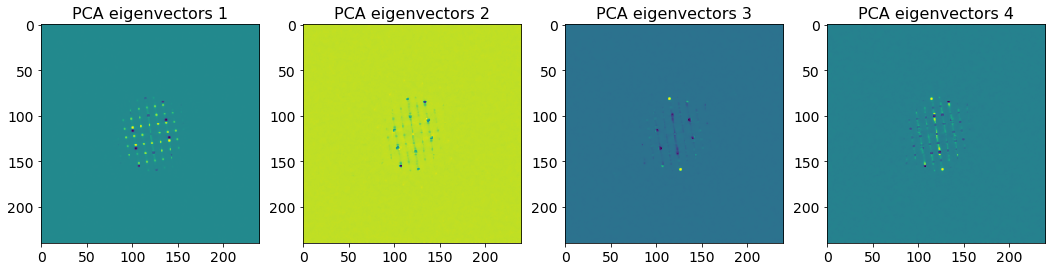

In [20]:
# plot the eigenvectors
plt.figure(1, figsize=(18,12))
ax = plt.gca()
indx=[1,2,3,4]

for i in indx:
    plt.subplot(1,4,i)
    a1=pca.components_[i-1,:]
    loadings = np.reshape(a1, (240,240))
    plt.imshow(loadings.T)
    plt.title("PCA eigenvectors " + "{}".format(i), fontsize=16)
    plt.xlabel("",fontsize=16)
    plt.ylabel("", fontsize=16)
    plt.tick_params(labelsize=14);

(57600,)


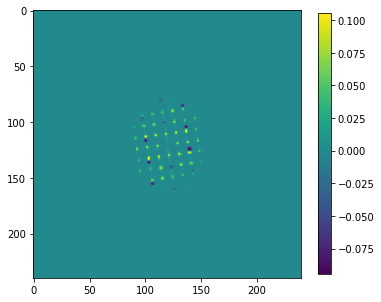

In [23]:
plt.figure(2, figsize=(6,6))
a1=pca.components_[0,:]
print(a1.shape)
eigenvector = np.reshape(a1, (240, 240))
im = plt.imshow(eigenvector.T)
plt.colorbar(im, shrink=0.8)

# NMF analysis for phase visualization

In [25]:
from sklearn.decomposition import NMF
from random import randint

# How many endmembers? Will learn how to pick this during PCA. 
k = 2
model = NMF(n_components=k, init='random', random_state=randint(0, 1000))
endmembers = model.fit(Xt).components_ # X in our equation
abundances = model.transform(Xt) # beta in our equation
error = model.fit(Xt).reconstruction_err_ # reconstruction error

In [26]:
print(error)

111.79411302323894


In [27]:
print(endmembers.shape)

(2, 57600)


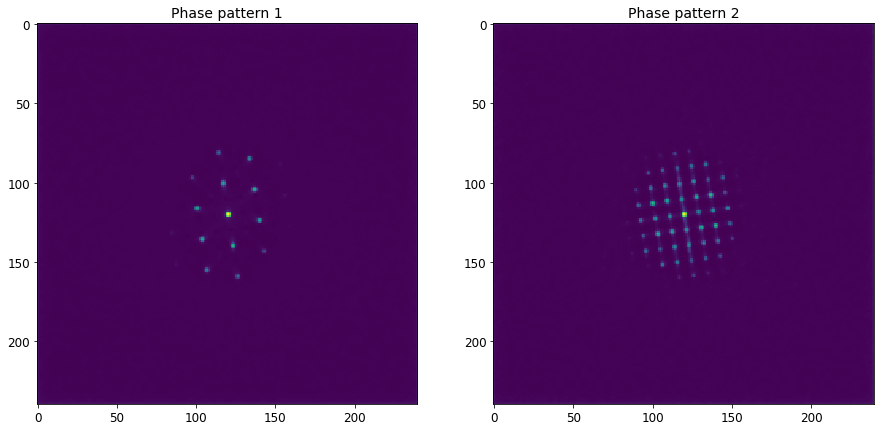

In [29]:
# plot the results
plt.figure(1, figsize=(15,60)) #(10 40)
ax = plt.gca()
indx=[1,2]
for i in indx:
    im = plt.subplot(1,2,i)
    a1=endmembers[i-1,:]
    eigenfaces1 = np.reshape(a1, (240, 240))
    plt.imshow(eigenfaces1.T)
    plt.title("Phase pattern " + "{}".format(i), fontsize=14) # 14
    plt.xlabel("",fontsize=14) 
    plt.ylabel("", fontsize=14) 
    plt.tick_params(labelsize=12); # 12
#plt.colorbar(shrink=0.08)

#plt.savefig('Phase pattern3.png',bbox_inches='tight',dpi=300)
#plt.show()

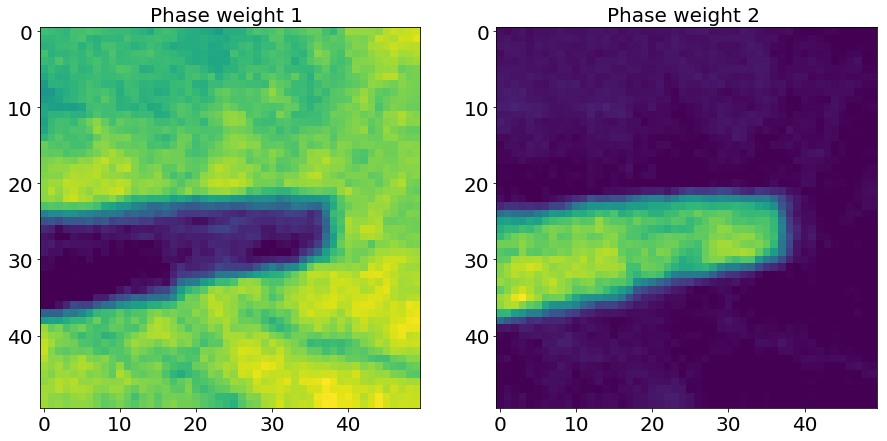

In [30]:
# plot the results
plt.figure(1, figsize=(15,60))
ax = plt.gca()
indx=[1,2]
for i in indx:
    im = plt.subplot(1,2,i)
    a1=abundances[:,i-1]
    eigenfaces1 = np.reshape(a1, (50, 50))
    plt.imshow(eigenfaces1.T)
    plt.title("Phase weight " + "{} ".format(i), fontsize=20) # 14
    plt.xlabel("",fontsize=14)
    plt.ylabel("", fontsize=14)
    plt.tick_params(labelsize=20); # 12
# plt.colorbar(format='%.2f',shrink=0.08)

#plt.savefig('Phase weight3.png',bbox_inches='tight',dpi=300)
#plt.show()

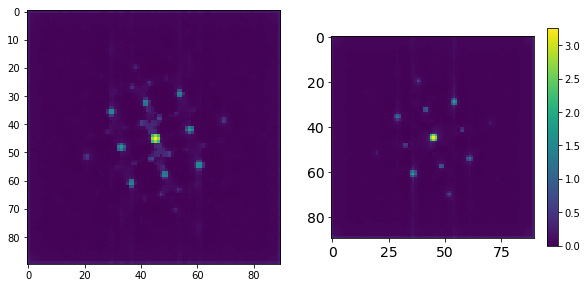

In [21]:
# plot the results
plt.figure(1, figsize=(10,40))
plt.clf()
plt.subplot(1,2,1)
a1=endmembers[0,:]
eigenfaces1 = np.reshape(a1, (90, 90))
plt.imshow(eigenfaces1.T)

plt.subplot(1,2,2)
a1=endmembers[1,:]
eigenfaces1 = np.reshape(a1, (90, 90))
im = plt.imshow(eigenfaces1.T)

plt.tick_params(labelsize=14)
plt.colorbar(im, shrink=0.1)

#plt.subplot(1,3,3)
#a1=endmembers[2,:]
#eigenfaces1 = np.reshape(a1, (150, 150))
#plt.imshow(eigenfaces1.T)
#plt.colorbar(im, shrink=0.1)



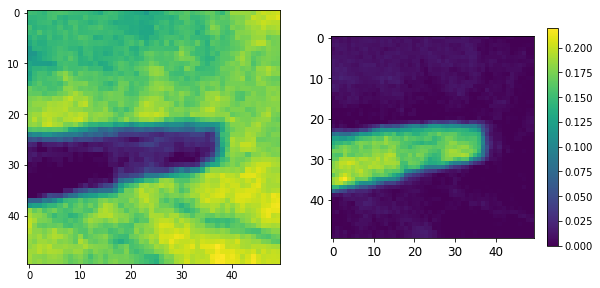

In [133]:
# plot the results
plt.figure(2, figsize=(10,40))

plt.subplot(1,2,1)
a1=abundances[:,0]
eigenfaces1 = np.reshape(a1, (50, 50))
plt.imshow(eigenfaces1.T)

plt.subplot(1,2,2)
a1=abundances[:,1]
eigenfaces1 = np.reshape(a1, (50, 50))
im = plt.imshow(eigenfaces1.T)

plt.tick_params(labelsize=12)
plt.colorbar(im, shrink=0.1)


#plt.subplot(1,3,3)
#a1=abundances[:,2]
#eigenfaces1 = np.reshape(a1, (38, 38))
#im = plt.imshow(eigenfaces1.T)
#plt.tick_params(labelsize=12)
#plt.colorbar(im, shrink=0.1)

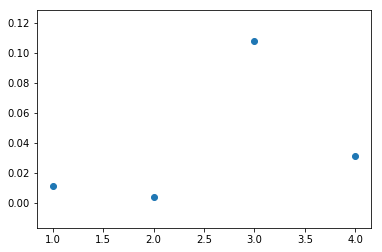

In [341]:
#%% plot the abundances for diffraction pattern 50
plt.figure(3)
plt.clf()
labels = ['E1','E2','E3','E4']
x = [1,2,3,4]
plt.scatter(x,abundances[100,:])


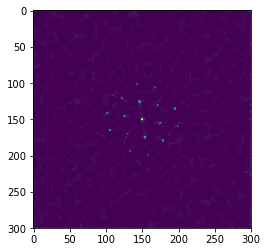

In [342]:
sample = np.reshape(Xt[100,:], (300, 300))
plt.imshow(sample.T)

# Multidimensional data scaling, similarity measure

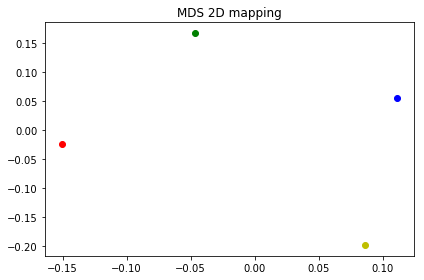

In [230]:
#%% ----------- Multidimensional Data Scaling --------------------------
# Look at multidimensional data scaling of cosine dissimilarity
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances

# compute the cosine dissimilarity for the collection of samples
d = pairwise_distances(endmembers, metric = 'cosine')

# Create MDS model
mds = MDS(n_components=2, dissimilarity="precomputed")

# Identify MDS mapping for our data
pos = mds.fit(d).embedding_

# MDS of 'D' in 2D
plt.figure(12)
plt.clf()
plt.plot(pos[0,0],pos[0,1],'bo')
plt.plot(pos[1,0],pos[1,1],'go')
plt.plot(pos[2,0],pos[2,1],'ro')
plt.plot(pos[3,0],pos[3,1],'yo')
#plt.plot(pos[4,0],pos[3,1],'go')
#plt.plot(pos[5,0],pos[3,1],'ro')
plt.title('MDS 2D mapping')
plt.tight_layout()

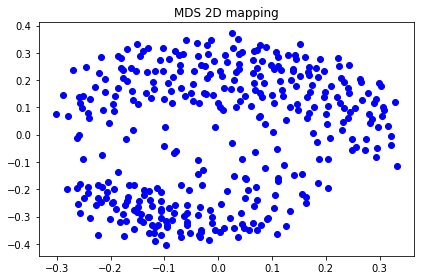

In [125]:
#%% ----------- Multidimensional Data Scaling --------------------------
# Look at multidimensional data scaling of cosine dissimilarity
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances

# compute the cosine dissimilarity for the collection of samples
d = pairwise_distances(Xt, metric = 'cosine')

# Create MDS model
mds = MDS(n_components=2, dissimilarity="precomputed")

# Identify MDS mapping for our data
pos = mds.fit(d).embedding_

# MDS of 'D' in 2D
plt.figure(12)
plt.clf()
plt.plot(pos[:,0],pos[:,1],'bo')
plt.title('MDS 2D mapping')
plt.tight_layout()


In [333]:
from sklearn.metrics.pairwise import pairwise_distances
# generate dissimilarity matrix for L1, "cityblock" or "taxicab"
d1 = pairwise_distances(endmembers, metric='manhattan')

In [334]:
#%%
# generate dissimilarity matrix for L2, "Euclidean"
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance

# generate dissimilarity matrix for L1, "cityblock" or "taxicab"
d2 = euclidean_distances(endmembers)

# generate dissimilarity matrix for cosine metric.
d3 = cosine_similarity(endmembers)

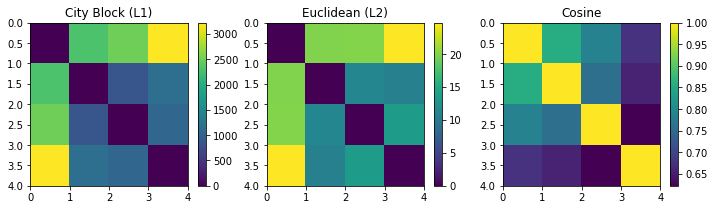

In [335]:
#%% Visualize Dissimilarity matrices
# cityblock
plt.figure(3, figsize=(12,3))
plt.clf()
plt.subplot(1,3,1)
plt.pcolor(d1)
plt.gca().invert_yaxis()
plt.title('City Block (L1)')
plt.colorbar()

# Euclidean
plt.figure(3)
plt.subplot(1,3,2)
plt.pcolor(d2)                            # View as heatmap
plt.gca().invert_yaxis()
plt.title('Euclidean (L2)')
plt.colorbar()

# And Cosine
plt.figure(3)
plt.subplot(1,3,3)
plt.pcolor(d3)                            # View as heatmap
plt.gca().invert_yaxis()
plt.title('Cosine')
plt.colorbar()

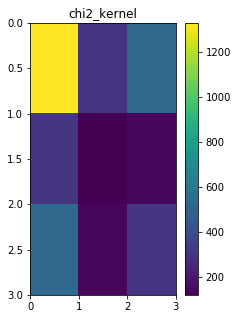

In [239]:
from sklearn.metrics.pairwise import linear_kernel  
# generate dissimilarity matrix for cosine metric.
d4 = linear_kernel(endmembers)

# And Cosine
plt.figure(4,figsize=(15,5))
plt.subplot(1,4,1)
plt.pcolor(d4)                            # View as heatmap
plt.gca().invert_yaxis()
plt.title('chi2_kernel')
plt.colorbar()

my_KL:  0.00 scipy_KL:  0.00
my_KL:  0.12 scipy_KL:  0.12


C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


my_KL:  0.50 scipy_KL:  0.50
my_KL:  1.12 scipy_KL:  1.12
my_KL:  2.00 scipy_KL:  2.00
my_KL:  3.12 scipy_KL:  3.12
my_KL:  4.50 scipy_KL:  4.50
my_KL:  6.12 scipy_KL:  6.12
my_KL:  8.00 scipy_KL:  8.00


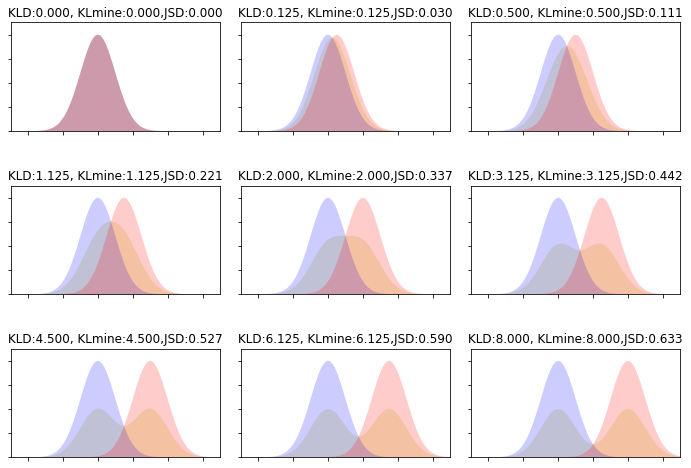

In [299]:
# https://qiita.com/Rowing0914/items/2f3fcb114ae671c7c394

# math definition of entropy => http://mathworld.wolfram.com/Entropy.html
# scipy entropy => https://github.com/scipy/scipy/blob/v1.1.0/scipy/stats/_distn_infrastructure.py#L2478-L2519

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, entropy

def entropy_multi(p, q):
  return np.sum(p * np.log(p / q), axis=0)

def entropy_single(p):
  return np.sum(p * np.log(p), axis=0)

def KLD(pk, qk):
  # arraynise
  pk = np.asarray(pk)
  # normalise
  pk = 1.0*pk / np.sum(pk, axis=0)
  # check to decide if we apply single or multi entorpy
  if qk is None:
      return np.sum(entropy_single(pk), axis=0)
  else:
      # arraynise
      qk = np.asarray(qk)
      if len(qk) != len(pk):
          raise ValueError("qk and pk must have same length.")
      qk = 1.0*qk / np.sum(qk, axis=0)
      return np.sum(entropy_multi(pk, qk), axis=0)

# data prep
x = np.linspace(-10.0, 10.0, 1000)

# graph setting
plt.figure(figsize=(12,8))

# gradually shift the distribution
for i in np.arange(3):
    for j in np.arange(3):
        # index to shift
        index = i*3 + j
        # probabilistic distribution function
        p = norm.pdf(x, loc=0, scale=1)
        q = norm.pdf(x, loc=index*0.5, scale=1)
        # mean of them
        m = (p+q)/2
        # scipy entropy
        kl = entropy(p, q)
        kl_mine = KLD(p,q)
        # checker
        print("my_KL: ", "{0:.2f}".format(kl_mine), "scipy_KL: ", "{0:.2f}".format(kl))
        # prep for js divergence
        kl_pm = KLD(p, m)
        kl_qm = KLD(q, m)
        js = (kl_pm + kl_qm)/2
        plt.subplot(3,3,i*3+j+1)
        plt.fill_between(x, m, facecolor="y", alpha=0.2)
        plt.fill_between(x, p, facecolor="b", alpha=0.2)
        plt.fill_between(x, q, facecolor="r", alpha=0.2)
        plt.xlim(-5, 7)
        plt.ylim(0,0.45)
        plt.title("KLD:{:>.3f}".format(kl) + ", KLmine:{:>.3f}".format(kl_mine) + ",JSD:{:>.3f}".format(js))
        plt.tick_params(labelbottom="off")
        plt.tick_params(labelleft="off")

plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

my_KL:  0.00 scipy_KL:  0.00
my_KL:  0.00 scipy_KL:  0.00
my_KL:  0.00 scipy_KL:  0.00
my_KL:  0.00 scipy_KL:  0.00


C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


my_KL:  0.00 scipy_KL:  0.00
my_KL:  0.00 scipy_KL:  0.00
my_KL:  0.00 scipy_KL:  0.00
my_KL:  0.00 scipy_KL:  0.00
my_KL:  0.00 scipy_KL:  0.00


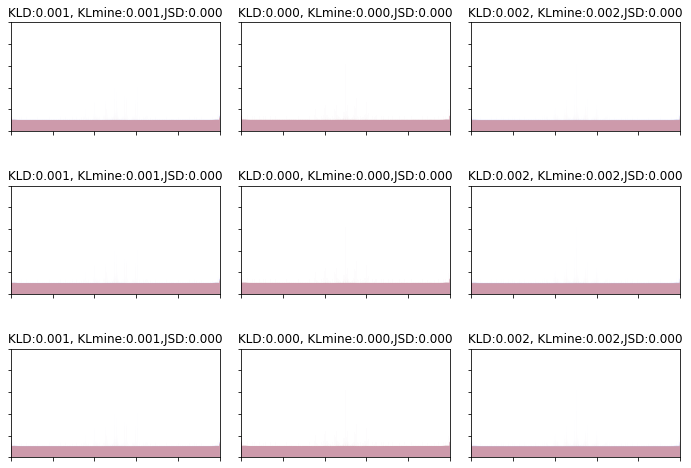

In [300]:
# data prep
x = np.linspace(0, 10.0, 90000)

# graph setting
plt.figure(figsize=(12,8))

# gradually shift the distribution
for i in np.arange(3):
    for j in np.arange(3):
        # index to shift
        index = i*3 + j
        # probabilistic distribution function
        p = endmembers[0,:]+1
        q = endmembers[j-1,:]+1
        # mean of them
        m = (p+q)/2
        # scipy entropy
        kl = entropy(p, q)
        kl_mine = KLD(p,q)
        # checker
        print("my_KL: ", "{0:.2f}".format(kl_mine), "scipy_KL: ", "{0:.2f}".format(kl))
        # prep for js divergence
        kl_pm = KLD(p, m)
        kl_qm = KLD(q, m)
        js = (kl_pm + kl_qm)/2
        plt.subplot(3,3,i*3+j+1)
        plt.fill_between(x, m, facecolor="y", alpha=0.2)
        plt.fill_between(x, p, facecolor="b", alpha=0.2)
        plt.fill_between(x, q, facecolor="r", alpha=0.2)
        plt.xlim(0, 10)
        plt.ylim(0,10)
        plt.title("KLD:{:>.3f}".format(kl) + ", KLmine:{:>.3f}".format(kl_mine) + ",JSD:{:>.3f}".format(js))
        plt.tick_params(labelbottom="off")
        plt.tick_params(labelleft="off")

plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

In [ ]:
image read some typical FFT parttern

In [337]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
endmembers1 = min_max_scaler.fit_transform(endmembers)

my_KL:  0.00 scipy_KL:  0.00


C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


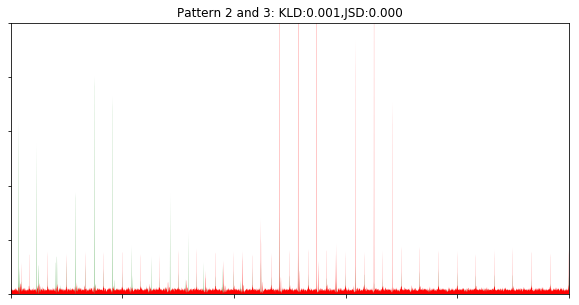

In [325]:
x = np.linspace(0, 10.0, 90000)

p = endmembers[1,:]+1
q = endmembers[2,:]+1
# mean of them
m = (p+q)/2

kl = entropy(p, q)
kl_mine = KLD(p,q)
# checker
print("my_KL: ", "{0:.2f}".format(kl_mine), "scipy_KL: ", "{0:.2f}".format(kl))
 # prep for js divergence
kl_pm = KLD(p, m)
kl_qm = KLD(q, m)
js = (kl_pm + kl_qm)/2



plt.figure(1,figsize=(10,5))
# plt.fill_between(x, m, facecolor="y")
plt.fill_between(x, p, facecolor="g")
plt.fill_between(x, q, facecolor="r")
plt.xlim(6, 7)
plt.ylim(1,2)
# plt.title("KLD:{:>.3f}".format(kl) + ", KLmine:{:>.3f}".format(kl_mine) + ",JSD:{:>.3f}".format(js))
plt.title("Pattern 2 and 3: " + "KLD:{:>.3f}".format(kl) + ",JSD:{:>.3f}".format(js))
plt.tick_params(labelbottom="off")
plt.tick_params(labelleft="off")

In [271]:
max(endmembers[0,:])

7.3995944129180975

#  Pearson correlation coefficient and Spearman rank correlation coefficient

In [332]:
from scipy import stats
stats.spearmanr(endmembers)

MemoryError: 

array([[1.        , 0.05997   , 0.18569457, 0.06258626],
       [0.05997   , 1.        , 0.110003  , 0.02534653],
       [0.18569457, 0.110003  , 1.        , 0.03488749],
       [0.06258626, 0.02534653, 0.03488749, 1.        ]])

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


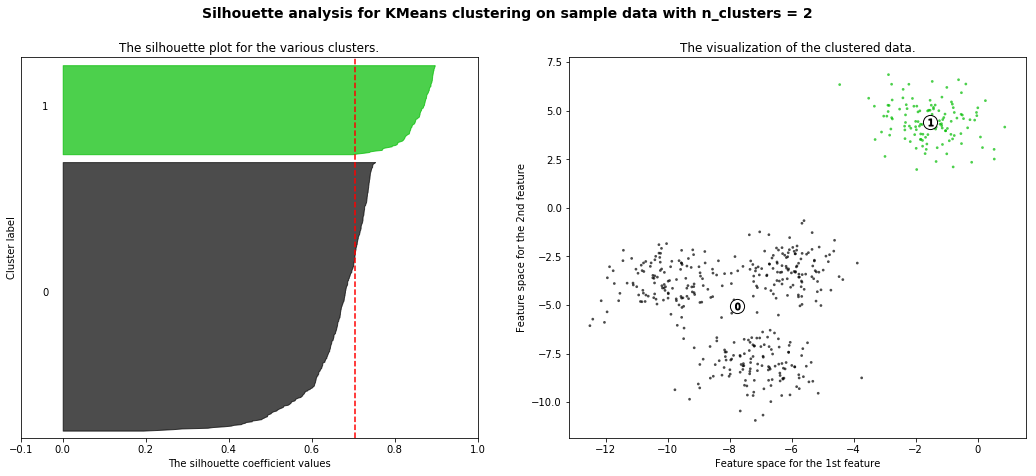

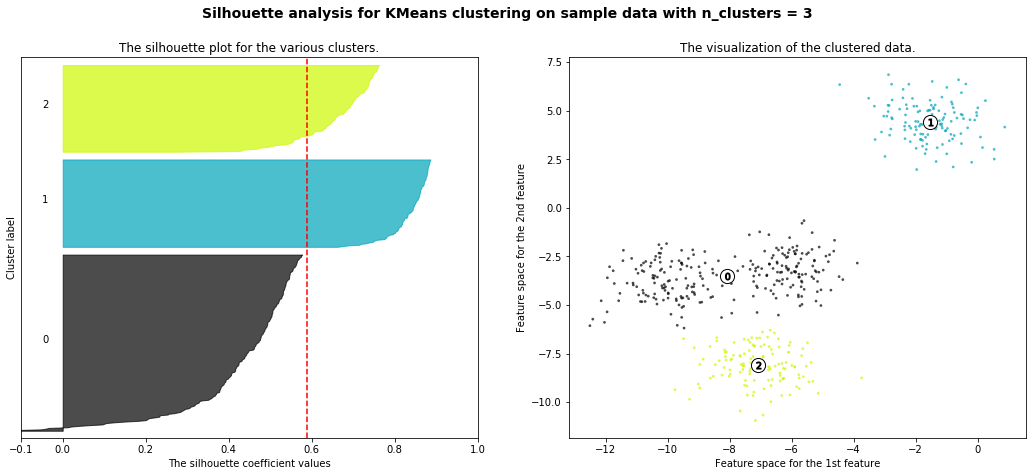

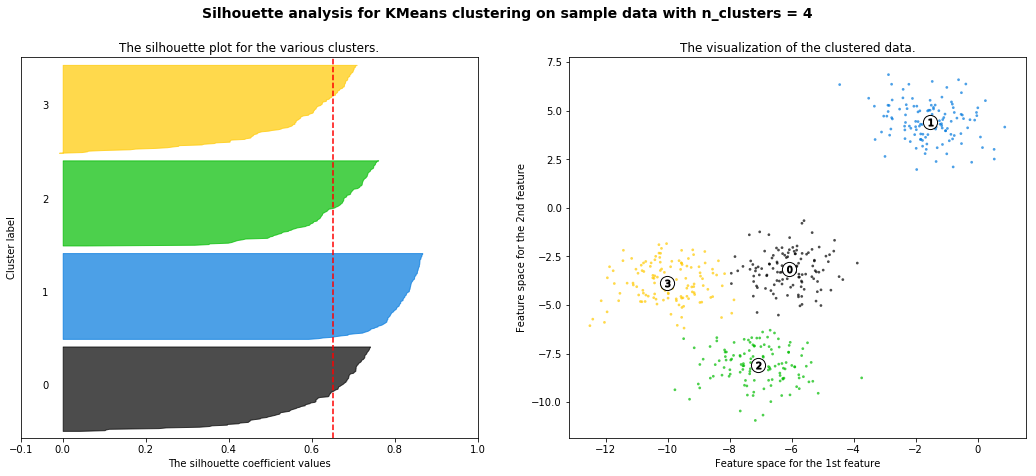

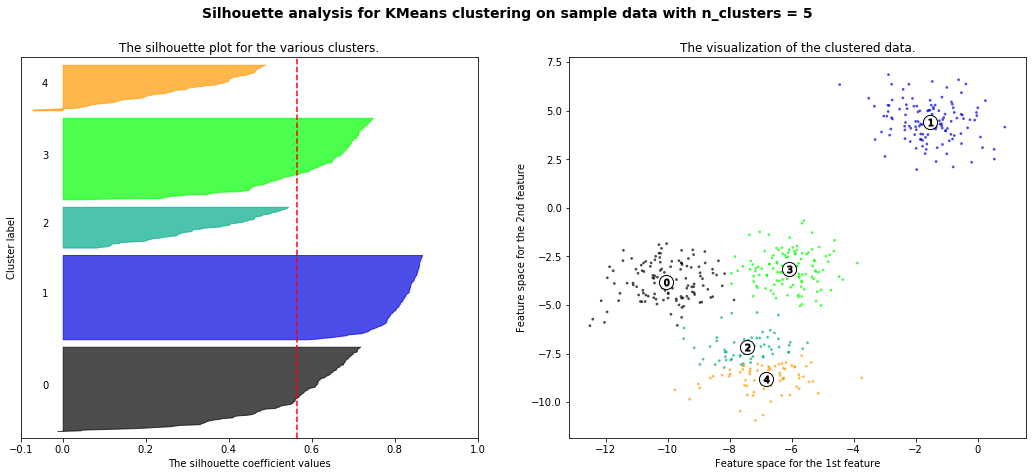

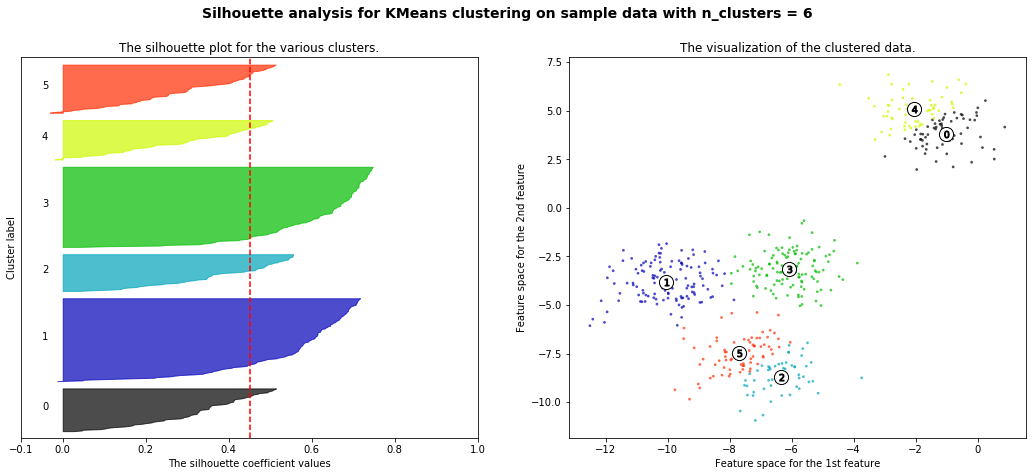

In [450]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()